<a href="https://colab.research.google.com/github/AhmadTaha96/Quora-Questions-Pair-Similarity/blob/main/Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [18]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Explorator Data Analysis

We shall now do some Exploratory Data Analysis in order to get some insight in the data, Candidate Feature, Remove some rows, Drop some columns, etc..

In [20]:
df = pd.read_csv("/content/Data/questions.csv")

In [ ]:
df.shape

(404351, 6)

In [ ]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We can notice from the cell above that we have some rows with Null value, as their number is small we will drop them from our dataframe rather than trying to fix them or impute them.

In [21]:
# you certinaly can do df.dropna(inplace = True)
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404348 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404348 non-null  int64 
 1   qid1          404348 non-null  int64 
 2   qid2          404348 non-null  int64 
 3   question1     404348 non-null  object
 4   question2     404348 non-null  object
 5   is_duplicate  404348 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


Now as we have sucessfully dropped those Null values from our processiong let's do some analysis to see the distrbuion of data give class label.

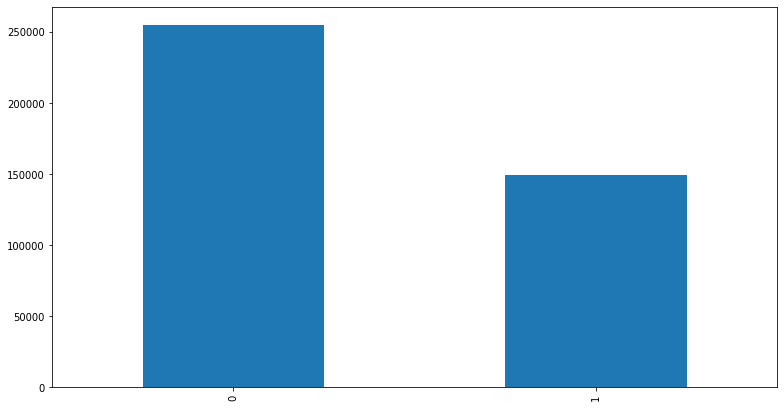

In [23]:
df["is_duplicate"].value_counts().plot(kind = "bar", figsize = (13, 7))
plt.show()

Now this is unbalanced dataset here as we clearely will get more non-duplicates data than duplicates but let's get the actual ration of what we have here.

In [ ]:
ratio_of_non_duplicate = len(df[df["is_duplicate"] == 0]) / len(df)
ratio_of_duplicate = len(df[df["is_duplicate"] == 1]) / len(df)

In [ ]:
print("Ratio of Non-Duplicates Questions =", ratio_of_non_duplicate * 100, '%')
print("Ratio of Duplicates Questions =", ratio_of_duplicate * 100, '%')

Ratio of Non-Duplicates Questions = 63.07487609682748 %
Ratio of Duplicates Questions = 36.92512390317251 %


As we have 63% of class zero and approximately 37% of class 1 we shall be careful while splitting data between train and test set, because we don't want the data in one of them to be even more baised toward the other class.

We can apply splitting just randomly but we don't want that here, but in the meantime let's just try splitting ranomly to inspect the distributing of class label here.

In [ ]:
x1, x2 = train_test_split(df, test_size = 0.2)

In [ ]:
print("Length of testing trainset =", len(x1))
print("Length of testing testset =", len(x2))

Length of testing trainset = 323478
Length of testing testset = 80870


In [ ]:
ratio_of_non_duplicate_x1 = len(x1[x1["is_duplicate"] == 0]) / len(x1)
ratio_of_duplicate_x1 = len(x1[x1["is_duplicate"] == 1]) / len(x1)

In [ ]:
ratio_of_non_duplicate_x2 = len(x2[x2["is_duplicate"] == 0]) / len(x2)
ratio_of_duplicate_x2 = len(x2[x2["is_duplicate"] == 1]) / len(x2)

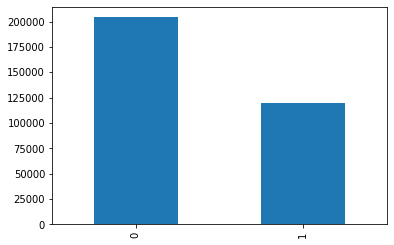

In [ ]:
x1["is_duplicate"].value_counts().plot(kind = "bar")
plt.show()

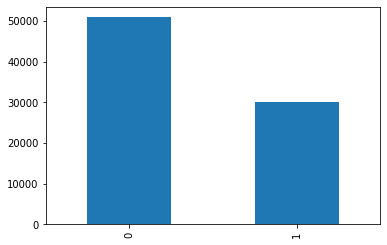

In [ ]:
x2["is_duplicate"].value_counts().plot(kind = "bar")
plt.show()

In [ ]:
print("Ratio of Non-Duplicates Questions is testing trainset =", ratio_of_non_duplicate_x1 * 100, '%')
print("Ratio of Duplicates Questions in testing trainset =", ratio_of_duplicate_x1 * 100, '%')

Ratio of Non-Duplicates Questions is testing trainset = 63.10846487241791 %
Ratio of Duplicates Questions in testing trainset = 36.891535127582095 %


In [ ]:
print("Ratio of Non-Duplicates Questions is testing testset =", ratio_of_non_duplicate_x2 * 100, '%')
print("Ratio of Duplicates Questions in testing testset =", ratio_of_duplicate_x2 * 100, '%')

Ratio of Non-Duplicates Questions is testing testset = 62.94052182515147 %
Ratio of Duplicates Questions in testing testset = 37.05947817484852 %


In [24]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_index, test_index in split.split(df, df["is_duplicate"]):
  train_data = df.iloc[train_index]
  test_data = df.iloc[test_index]

In [ ]:
print("Ratio of negative class in training data =", (train_data["is_duplicate"].value_counts()[0] / len(train_data)) * 100, '%')
print("Ratio of positive class in training data =", 100 - (train_data["is_duplicate"].value_counts()[0] / len(train_data)) * 100, '%')

Ratio of negative class in training data = 63.07476860868436 %
Ratio of positive class in training data = 36.92523139131564 %


In [ ]:
print("Ratio of negative class in testing data =", (test_data["is_duplicate"].value_counts()[0] / len(test_data)) * 100, '%')
print("Ratio of positive class in testing data =", 100 - (test_data["is_duplicate"].value_counts()[0] / len(test_data)) * 100, '%')

Ratio of negative class in testing data = 63.07530604674169 %
Ratio of positive class in testing data = 36.92469395325831 %


As this method would preserve the ratio a little bit better than the traditional one, I would prefere to use it over the old one even though the ratio is not large but still a good method if one have an important variable and does not want to be absent in test or cross validate data.

Now as we cleaned some part of the data let's try to detect duplicated rows.

In [ ]:
print("Number of repeated rows in train data =", sum(train_data.duplicated()))

Number of repeated rows in train data = 0


Getting Number of rows in train data with just one word in it, something to mention that some of those rows are just a question mark meaning that there is no question at all here, we can drop those rows no doubt but i choose to keep them.

In [ ]:
print("Number of rows in train data with just one word in question1 =", len(train_data[train_data["question1"].str.len() == 1]))

Number of rows in train data with just one word in question1 = 16


In [ ]:
train_data[train_data["question1"].str.len() == 1]

,id,qid1,qid2,question1,question2,is_duplicate
158800,158800,314005,314006,A,Do men forgive their wives when they cheat on ...,0
151943,151943,300557,300558,o,What is this - “This website/URL has been bloc...,0
108994,108994,216144,216145,i,What questions to ask any drdummer?,0
189689,189689,374512,374513,?,Who is Noah?,0
402484,402484,786227,786228,?,What is cisco router technical support phone n...,0
357182,357182,699485,699486,H,Should I forgive the cheater?,0
273103,273103,537069,537070,?,"How can I describe Quora, in all its glory, to...",0
199140,199140,393002,393003,I,What is the connection between Donald trump an...,0
20797,20797,41490,41491,?,What is the Gmail tech support help phone number?,0
134422,134422,266194,266195,?,What is your take on the undercover report tha...,0


In [ ]:
print("Number of rows in train data with just one word in question2 =", len(train_data[train_data["question2"].str.len() == 1]))

Number of rows in train data with just one word in question2 = 2


In [ ]:
train_data[train_data["question2"].str.len() == 1]

,id,qid1,qid2,question1,question2,is_duplicate
198943,198943,392619,392620,What is this?,o,0
47064,47064,93706,93707,Is there anywhere in the world offering pain m...,?,0


In [ ]:
pd.merge(train_data[train_data["question1"].str.len() == 1], train_data[train_data["question2"].str.len() == 1], on = 'id')

,id,qid1_x,qid2_x,question1_x,question2_x,is_duplicate_x,qid1_y,qid2_y,question1_y,question2_y,is_duplicate_y


So there is now common rows between two previous dataframes where on cell is just one word or one letter as one letter count as word, hence there is not at least one row with question1 is one word and question2 is one word as well.

Something to notice here that each of the previous rows label is equal to 0 which means there no duplicates here and that make sense because it is not logical to have for example question1 with one word and question2 with 20 words to be duplicates and that give us a clue on how importance is length of questions feature.

Let's inspect now number of unique question in train data, the frequency of questions we have as this would be a very important and informative signal if one can inspect it right.

In [ ]:
question1 = train_data["qid1"].values
question2 = train_data["qid2"].values
print("Number of unique questions in question1 column =", len(np.unique(question1)))
print("Number of unique questions in question2 column =", len(np.unique(question2)))
print("Total Number of unique questions in each columns =", len(np.unique(question1)) + len(np.unique(question2)))
print("Total Number of unique questions in both columns =", len(np.unique(question1 + question2)))

Number of unique questions in question1 column = 320122
Number of unique questions in question2 column = 319153
Total Number of unique questions in each columns = 639275
Total Number of unique questions in both columns = 320689


In [ ]:
questions_ids = pd.Series(train_data["qid1"].tolist() + train_data["qid2"].tolist())

In [ ]:
print("Number of repeated questions in train_data =", np.sum(questions_ids.value_counts() > 1))

Number of repeated questions in train_data = 9442


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


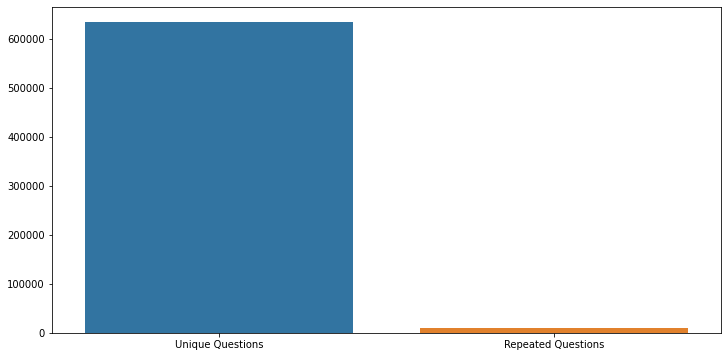

In [ ]:
x = ["Unique Questions", "Repeated Questions"]
y = [len(np.unique(questions_ids)), np.sum(questions_ids.value_counts() > 1)]
plt.figure(figsize = (12, 6))
sns.barplot(x, y)
plt.show()

So it seem to say that some of questions are reapeated buy the majority are not, as we have only less than 10k questions repeated among them all, but let's see if repeated questions affect the label of not, but first let's also try to plot the histogram to see the distribuiton of frequency of thoses questions.

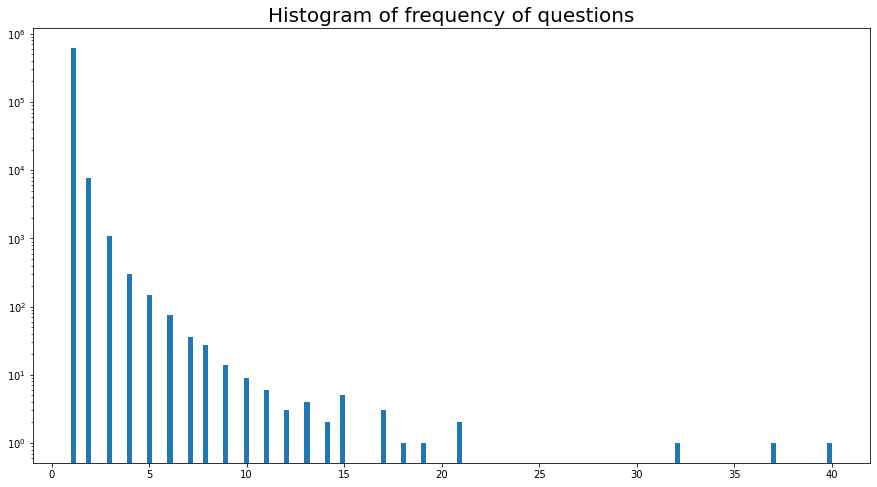

In [ ]:
plt.figure(figsize = (15, 8))
plt.hist(questions_ids.value_counts(), bins = 150)
plt.yscale("log")
plt.title("Histogram of frequency of questions", size = 20)
plt.show()

This distribution look like power law distribution where majority of  values tend to gather at some area of the space and just few values spread around the large values, we can't conver it here into normal even if we conside it as log-normal because we don't here deal with actual values, as the actual values is the question1 and quesiton2 before designing the features.

In [ ]:
print("Number of questions which Repeated and Duplicates =", repeated_and_duplicate)
print("Number of questions which Repeated and Not Duplicates =", repeated_and_not_duplicate)

Number of questions which Repeated and Duplicates = 0
Number of questions which Repeated and Not Duplicates = 9442


In [ ]:
indicator_of_repeted = (questions_ids.value_counts() > 2)
indices_of_repeated = (questions_ids.value_counts() > 2).index.values

Example of repeated quesion which is the most frequenct one and was repeated 39 here in our train data.

**Note:** this number would diffre due to how you split your wheater it's blind split, disjoint split, etc..

In [ ]:
train_data[train_data["qid1"] == 7863]

,id,qid1,qid2,question1,question2,is_duplicate
287204,287204,7863,564391,"What is the cheapest, painless, easiest way to...",What is a way to commit suicide and not damagi...,0
364121,364121,7863,712782,"What is the cheapest, painless, easiest way to...",What is the most painless way to commit suicide?,1
50027,50027,7863,99580,"What is the cheapest, painless, easiest way to...",What is the cheapest method to commit suicide?,1
295677,295677,7863,580807,"What is the cheapest, painless, easiest way to...",What are some painless ways to commit suicide?,1
67356,67356,7863,133912,"What is the cheapest, painless, easiest way to...","What is the cheapest, easiest, least painful w...",1
304702,304702,7863,598308,"What is the cheapest, painless, easiest way to...",How do I convince someone not to commit suicide?,0
57938,57938,7863,115267,"What is the cheapest, painless, easiest way to...",How many people commit suicide in India everyday?,0
87462,87462,7863,173677,"What is the cheapest, painless, easiest way to...",What are some reasons not to suicide?,0
187946,187946,7863,371102,"What is the cheapest, painless, easiest way to...",What is the easiest way of committing suicide?,1
145988,145988,7863,288874,"What is the cheapest, painless, easiest way to...",What is the easiest way to suicide?,0


In [ ]:
ones = zeros = 0
for i in indices_of_repeated:
  if indicator_of_repeted[i]:
    # in case there is no rows realted to qid2 use Exception handling
    try:
      x = (train_data[train_data["qid1"] == i]["is_duplicate"]).values
      ones += len(x[x == 1])
      zeros += len(x[x == 0])
    except:
      continue

In [ ]:
for i in indices_of_repeated:
  if indicator_of_repeted[i]:
    # in case there is no rows realted to qid2 use Exception handling
    try:
      x = (train_data[train_data["qid2"] == i]["is_duplicate"]).values
      ones += len(x[x == 1])
      zeros += len(x[x == 0])
    except:
      continue

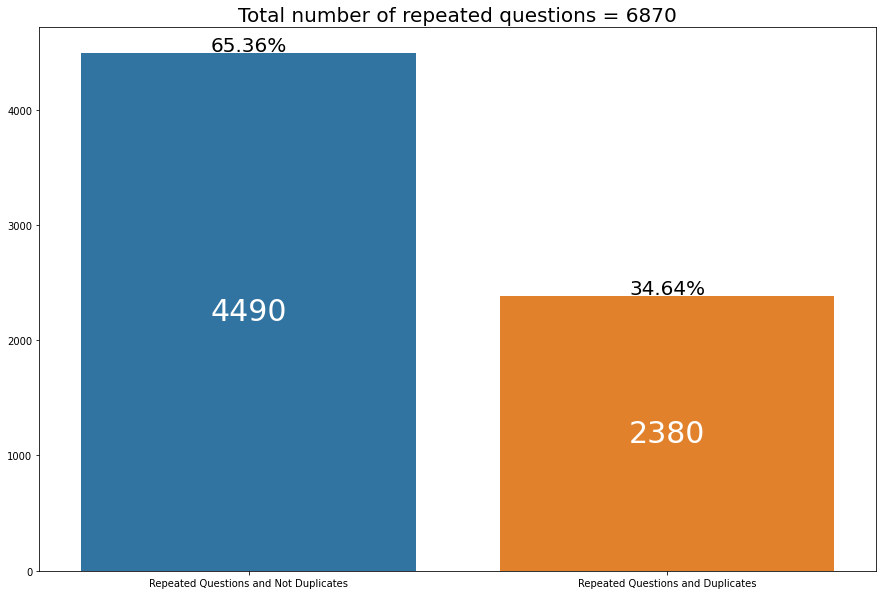

In [ ]:
plt.figure(figsize = (15, 10))
plt.title("Total number of repeated questions = {}".format(ones + zeros), size = 20)
plots = sns.barplot(x = ["Repeated Questions and Not Duplicates", "Repeated Questions and Duplicates"], y = [zeros, ones])
for bar in plots.patches:
  plt.annotate(int(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2), 
               size = 30, ha = "center", va = "center", color = "white")
i = 0
for bar in plots.patches:
  if i == 0:
    plt.annotate("{}%".format(round((zeros / (ones + zeros)) * 100, 2)), (bar.get_x() + bar.get_width() / 2, bar.get_height() + 66), 
               size = 20, ha = "center", va = "center")
    i += 1
  else:
    plt.annotate("{}%".format(round((ones / (ones + zeros)) * 100, 2)), (bar.get_x() + bar.get_width() / 2, bar.get_height() + 66),
               size = 20, ha = "center", va = "center")
plt.show()

So about 2 / 3 of repeated questions is not-duplicate and 1 / 3 is duplicate, given that fact we can desing realted feature which indicate wheater this quesion is repeated or not.

We have also notices that some of the rows in question1 and question2 containt non-ascii characters, we will take care of them in the preprocessing stage.

In [25]:
train_data.to_csv("/content/Data/train_data.csv")
test_data.to_csv("/content/Data/test_data.csv")